<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A52A2A;">
    <b>Introduccion:</b> <a class="tocSkip"></a>
    La tienda online Ice necesita que le ayude a planificar campañas publicitarias mediante reseñas de usuarios y expertos de videojuegos, plataformas y consolas. Para ello es necesario identificar los videojuegos, consolas y plataformas más populares para detectar proyectos prometedores.
</div>

In [ ]:
from scipy import stats as st
from scipy.stats import ttest_ind
from scipy.stats import levene
from matplotlib import pyplot as plt
import math as mt
import numpy as np
import pandas as pd 
import seaborn as sns 

In [2]:
games_info = pd.read_csv('/datasets/games.csv')

In [3]:
print(games_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A52A2A;">
    <b>Preparar los datos</b> <a class="tocSkip"></a>
    
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Código para reemplazar los nombres de las columnas y que queden todos en minúsculas:
</div>

In [4]:
new_col_names=[]
for old_name in games_info.columns:
    name_lowered=old_name.lower()
    new_col_names.append(name_lowered)
    
games_info.columns=new_col_names
print(games_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


La columna 'Year_of_release' podría trabajarse como todatetime y la columna 'user_score' debería ser float64. Este último debe ser procesado para poderlo convertir al formato adecuado. Más adelante se muestra el código.

In [5]:
games_info['year'] = pd.to_datetime(games_info['year_of_release'], format='%Y')
print(games_info['year'].dtype)

datetime64[ns]


<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Código para revisar los valores ausentes de todo el dataframe:
</div>

In [6]:
games_info.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
year                269
dtype: int64

In [7]:
games_info.duplicated().sum()

0

In [8]:
print(games_info.head(20))

                                            name platform  year_of_release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS       

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Código para revisar el tipo de valores ausentes de las columnas con valores ausentes mostradas anteriormente:

</div>


In [9]:
print(games_info['name'].unique())
print(games_info['name'].value_counts(dropna=False).sort_index())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
 Beyblade Burst                 1
 Fire Emblem Fates              1
 Frozen: Olaf's Quest           2
 Haikyu!! Cross Team Match!     1
 Tales of Xillia 2              1
                               ..
uDraw Studio                    1
uDraw Studio: Instant Artist    2
wwe Smackdown vs. Raw 2006      1
¡Shin Chan Flipa en colores!    1
NaN                             2
Name: name, Length: 11560, dtype: int64


In [10]:
print(games_info['year_of_release'].unique())
print(games_info['year_of_release'].value_counts(dropna=False).sort_index())

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
NaN        269
Name: year_of_release, dtype: int64


In [11]:
print(games_info['genre'].unique())
print(games_info['genre'].value_counts(dropna=False).sort_index())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Action          3369
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1498
Shooter         1323
Simulation       873
Sports          2348
Strategy         683
NaN                2
Name: genre, dtype: int64


In [12]:
print(games_info['critic_score'].unique())
print(games_info['critic_score'].value_counts(dropna=False).sort_index())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
13.0       1
17.0       1
19.0       6
20.0       3
21.0       1
        ... 
95.0      16
96.0      18
97.0      11
98.0       4
NaN     8578
Name: critic_score, Length: 83, dtype: int64


In [13]:
print(games_info['user_score'].unique())
print(games_info['user_score'].value_counts(dropna=False).sort_index())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.5       6
9.6       2
9.7       1
tbd    2424
NaN    6701
Name: user_score, Length: 97, dtype: int64


In [14]:
print(games_info['rating'].unique())
print(games_info['rating'].value_counts(dropna=False).sort_index())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
NaN     6766
Name: rating, dtype: int64


<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Diversas columnas tienen valores ausentes los cuales se abordan de distinta manera: 
    Los valores ausentes de las columnas 'name', 'genre' y 'year_of_release' representan menos del 2% del total de los datos por lo que no será un porblema dejarlos vacíos. 
    Por otro lado, los valores ausentes de las columnas 'critic_score', 'user_score' y 'rating' representan cerca del 50% de los datos por lo tanto no deben ignorarse. Ambos scores podrían rellenarse con la mediana en caso de que tengan valores exrtemos, si no, con la media. En el caso del rating, se podrian rellenar de acuerdo al género.
</div>
    


<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Se calcula la mediana de los valores presentes de cada columna para poder rellenar los ausentes y se crean columnas nuevas:
</div>

In [15]:
critics_dropna = games_info['critic_score'].dropna().median()
print(critics_dropna)
print(games_info['critic_score'].dropna().describe())
games_info['critic_score_filled'] = games_info['critic_score'].fillna(71.0)
print(games_info.head(20))

71.0
count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64
                                            name platform  year_of_release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9           

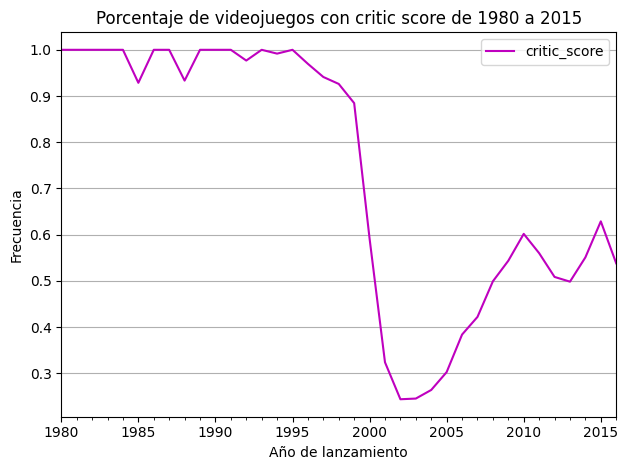

In [16]:
games_info['critic_score'].isna().groupby(games_info['year']).mean().plot(kind='line', color='m')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Porcentaje de videojuegos con critic score de 1980 a 2015')
plt.tight_layout()
plt.legend()
plt.grid(axis='y')

In [17]:
users_not_tbd = games_info['user_score'].replace('tbd', pd.NA)
print(users_not_tbd.value_counts(dropna=False))
users_notna = users_not_tbd.dropna()
print(users_notna)
users_median = users_notna.astype('float').median()
print(users_median)
print(users_notna.astype('float').describe())

NaN    9125
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
1         2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64
0          8
2        8.3
3          8
6        8.5
7        6.6
        ... 
16681    8.1
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 7590, dtype: object
7.5
count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


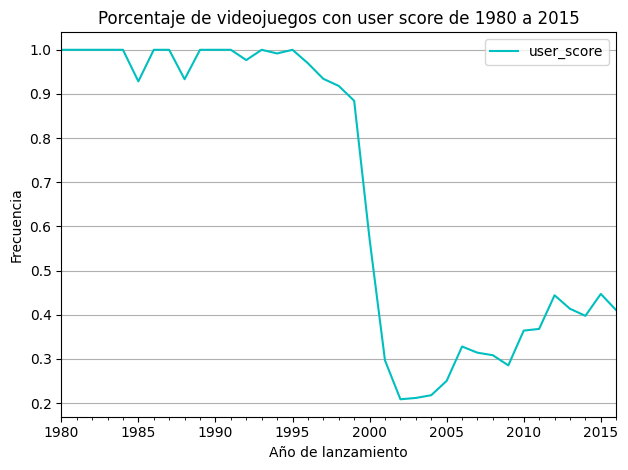

In [18]:
games_info['user_score'].isna().groupby(games_info['year']).mean().plot(kind='line', color='c')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Porcentaje de videojuegos con user score de 1980 a 2015')
plt.tight_layout()
plt.legend()
plt.grid(axis='y')

In [19]:
users_not_tbd = users_not_tbd.replace(pd.NA, '7.5')
print(users_not_tbd.value_counts(dropna=False))
games_info ['user_score_filled'] = users_not_tbd
print(games_info.head(20))


7.5    9376
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
0.5       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 95, dtype: int64
                                            name platform  year_of_release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck H

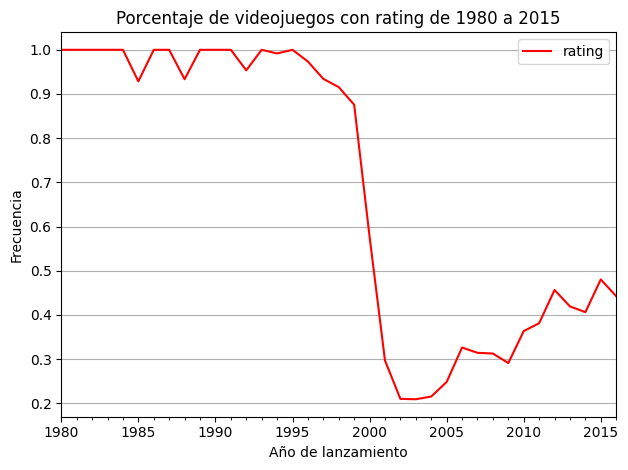

In [20]:
games_info['rating'].isna().groupby(games_info['year']).mean().plot(kind='line', color='r')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Porcentaje de videojuegos con rating de 1980 a 2015')
plt.tight_layout()
plt.legend()
plt.grid(axis='y')

In [21]:
games_info['rating_filled'] = games_info['rating']
def rating_list (genre_value,rating_value):
    games_info.loc[(games_info.genre == genre_value) & (games_info.rating_filled.isnull()), 'rating_filled'] = rating_value
rating_list("Action","E")
rating_list("Adventure","E")
rating_list("Fighting","T")
rating_list("Misc", "E")
rating_list("Platform", "E")
rating_list("Puzzle", "E")
rating_list("Racing", "E")
rating_list("Role-Playing", "E")
rating_list("Shooter", "T")
rating_list("Simulation", "E")
rating_list("Sports", "E")
rating_list("Strategy", "E")

print(games_info.sample(20))

                                                    name platform  \
4474                                     Madden NFL 2002      N64   
11613  World Series of Poker 2008: Battle for the Bra...     X360   
15192                                               DiRT       PC   
8495                                             F1 2011      3DS   
11213                     Batman: A Telltale Game Series      PS4   
15512                        Dynasty Warriors 8: Empires      PSV   
11231                                   Inazuma Eleven 3      3DS   
11767                               The Legend of Kage 2       DS   
1260   Ninja Hattori Kun: Ninja wa Shuugyou Degogiru ...      NES   
14630                        Pimp My Ride: Street Racing       DS   
13621             Blood Will Tell: Tezuka Osamu's Dororo      PS2   
11898  Winning Eleven Playmaker 2010: Aoki Samurai no...      Wii   
3761   2 in 1 Combo Pack: Sonic Heroes / Super Monkey...       XB   
1425             Dragon Quest III:

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Los valores ausentes de las columnas 'critic_score', 'user_score' y 'rating' se trataron de diferente manera; la columna 'critic_score' tenía sólo 'NaNs' los cuales fueron sustituidos por la mediana ya que la media y la mediana fueron diferentes entre sí. La columna 'user_score' tenía 'NaNs' y 'tbds', los 'tbd' fueron reemplazados por 'NaN' y luego rellenedos con la mediana total, en este caso la media y la mediana eran iguales, así que cualquiera de los dos datos era valido utilizar. Para la última columna ('rating') rellené los valores ausentes de acuerdo al genero.
    Con las gáficas lineales del comportamiento de los 'scores' por año vemos que antes del 2000 los videojuegos no tenían ninguna de las tres calificaciones, posterior al 2000 los juegos comiezan a tener calificaciones, con esto podria deducirse que los valores ausentes despues de este año se deben a la baja popularidad de los videojuegos, el porqué de esta baja popularidad es mas dificil de explicar pues se puede deber a la baja calidad del juego, a la deficiente mercadotecnia que se empleó para dar a conocer el juego y convencer de adquirirlo, etc. 
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Se calculan las ventas totales para cada juego:
</div>

In [22]:
games_info['total_sales'] = games_info['na_sales'] + games_info['eu_sales'] + games_info['jp_sales'] + games_info['other_sales']
print(games_info.head(20))

                                            name platform  year_of_release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS       

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A52A2A;">
    <b>Analizar datos</b> <a class="tocSkip"></a>
    
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Videojuegos lanzados por año:
</div>

         year  name
0  1980-01-01     9
1  1981-01-01    46
2  1982-01-01    36
3  1983-01-01    17
4  1984-01-01    14
5  1985-01-01    14
6  1986-01-01    21
7  1987-01-01    16
8  1988-01-01    15
9  1989-01-01    17
10 1990-01-01    16
11 1991-01-01    41
12 1992-01-01    43
13 1993-01-01    60
14 1994-01-01   121
15 1995-01-01   219
16 1996-01-01   263
17 1997-01-01   289
18 1998-01-01   379
19 1999-01-01   338
20 2000-01-01   350
21 2001-01-01   482
22 2002-01-01   829
23 2003-01-01   775
24 2004-01-01   762
25 2005-01-01   939
26 2006-01-01  1006
27 2007-01-01  1197
28 2008-01-01  1427
29 2009-01-01  1426
30 2010-01-01  1255
31 2011-01-01  1136
32 2012-01-01   653
33 2013-01-01   544
34 2014-01-01   581
35 2015-01-01   606
36 2016-01-01   502


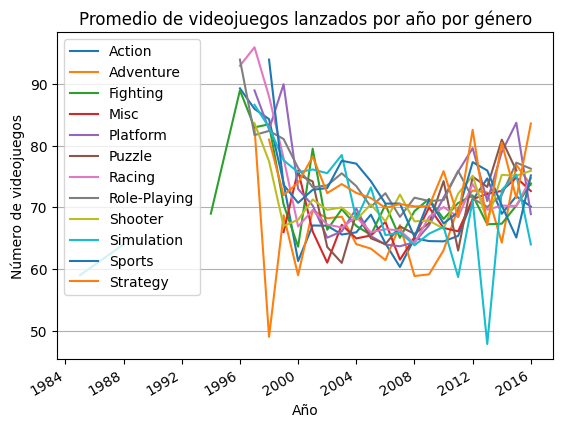

In [23]:
games_per_year = games_info.groupby('year')['name'].count().reset_index()
print(games_per_year)
games_info.pivot_table(index='year', columns='genre', values='critic_score', aggfunc='mean').plot(kind='line')
plt.xlabel('Año')
plt.ylabel('Número de videojuegos')
plt.title('Promedio de videojuegos lanzados por año por género')
plt.legend()
plt.grid(axis='y')

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Los años que tuvieron mayores ventas fue entre 2006 y 2011.
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Ventas por plataforma:
</div>

In [24]:
platform_sales = games_info.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
platform_sales['platform_total_sales'] = platform_sales.sum(axis=1)
print(platform_sales.sort_index(ascending=False))

          na_sales  eu_sales  jp_sales  other_sales  platform_total_sales
platform                                                                 
XOne         93.12     51.59      0.34        14.27                159.32
XB          186.69     60.95      1.38         8.72                257.74
X360        602.47    270.76     12.43        85.76                971.42
WiiU         38.10     25.13     13.01         5.95                 82.19
Wii         496.90    262.21     69.33        79.07                907.51
WS            0.00      0.00      1.42         0.00                  1.42
TG16          0.00      0.00      0.16         0.00                  0.16
SNES         61.23     19.04    116.55         3.22                200.04
SCD           1.00      0.36      0.45         0.05                  1.86
SAT           0.72      0.54     32.26         0.07                 33.59
PSV          12.58     13.12     21.91         6.46                 54.07
PSP         109.17     66.68     76.78

In [25]:
start_year = 1980
end_year = 1993
mask = (games_info['year'].dt.year < start_year) | (games_info['year'].dt.year > end_year)

games = games_info[mask]
popular_platforms = games.groupby('platform')['total_sales'].sum().sort_values().tail(10)
print(popular_platforms)

platform
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.76
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: total_sales, dtype: float64


<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Las plataformas que tuvieron mayores ventas fueron: PS2, PS3, X360, Wii y DS.
</div>

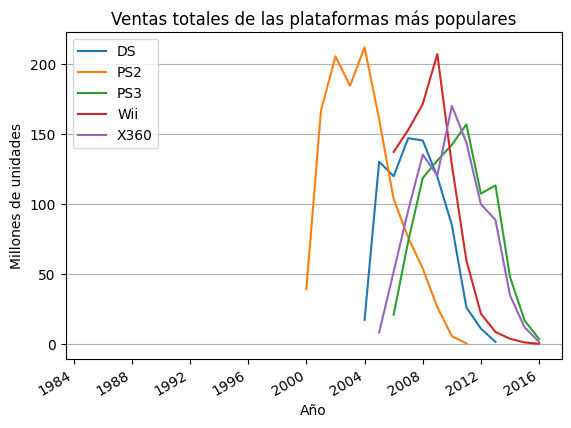

In [26]:
popular_platforms = list(games.groupby('platform')['total_sales'].sum().sort_values().tail(5).index)

(
    games_info[games_info['platform'].isin(popular_platforms)]
    .pivot_table(index='year',
                columns='platform',
                values='total_sales',
                aggfunc='sum')
    .plot(kind='line')
)
plt.xlabel('Año')
plt.ylabel('Millones de unidades')
plt.title('Ventas totales de las plataformas más populares')
plt.legend()
plt.grid(axis='y')

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Distribución basada en los datos de cada año para las 5 plataformas más populares:
</div>

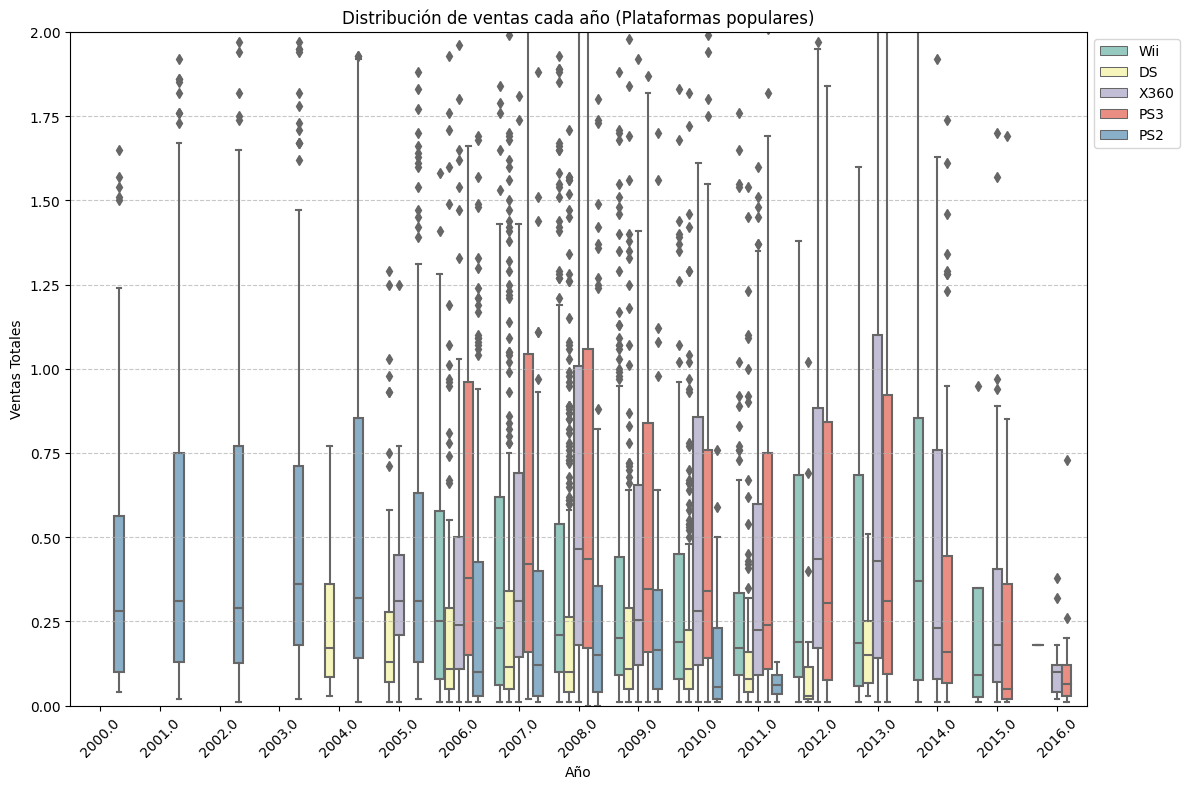

In [27]:
top_platforms = games[games['platform'].isin(popular_platforms)]

plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribución de ventas cada año (Plataformas populares)')

plt.ylim(0, 2.0)  

sns.boxplot(data=top_platforms, x='year_of_release', y='total_sales', hue='platform', palette='Set3', linewidth=1.5)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.show()

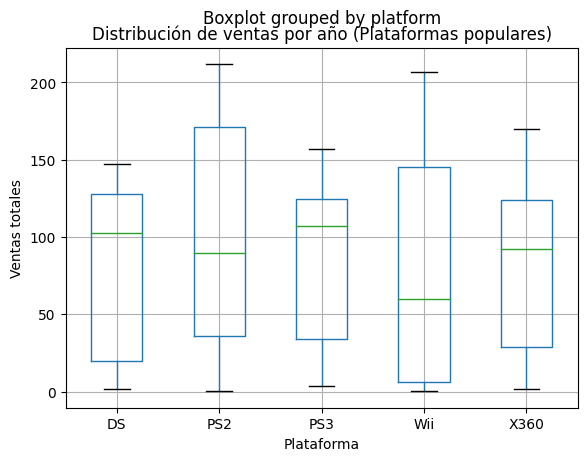

In [28]:
sales_by_year_platform = games.groupby(['year', 'platform'])['total_sales'].sum().reset_index()

sales_by_year_platform[sales_by_year_platform['platform'].isin(popular_platforms)][['total_sales','platform']].boxplot(
    column = 'total_sales',
    by = 'platform',
)
plt.title('Distribución de ventas por año (Plataformas populares)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.show()

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Las plataformas que eran populares pero ya no tienen ventas: PS, PS2, Wii y DS.
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Las plataformas tardan al rededor de 6 años en aparecer y desaparecer:
</div>

Text(0, 0.5, 'Ventas Totales')

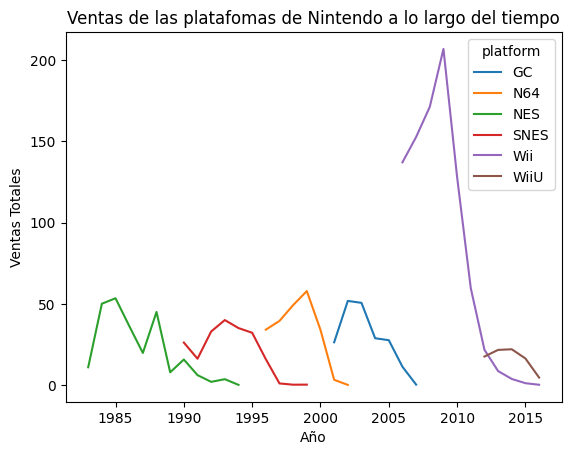

In [29]:
nintendo_platforms = ['NES','SNES','N64','GC','Wii','WiiU']
games_info[games_info['platform'].isin(nintendo_platforms)].pivot_table(index='year_of_release', 
                                                                        columns='platform', 
                                                                        values='total_sales', 
                                                                        aggfunc='sum').plot(kind='line')
plt.title('Ventas de las platafomas de Nintendo a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas Totales')

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    La información más relevante la encontramos a partir del año 1994, de tal modo que ignoraré de 1993 hacia atrás:
</div>

In [30]:
start_year = 1980
end_year = 1993
mask = (games_info['year'].dt.year < start_year) | (games_info['year'].dt.year > end_year)

games = games_info[mask]

print(games)
print(games['year'].value_counts(dropna=False))

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
6              New Super Mario Bros.       DS           2006.0      Platform   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Plataformas líderes en ventas por año: PS2, PS3, X360, Wii y DS.
</div>

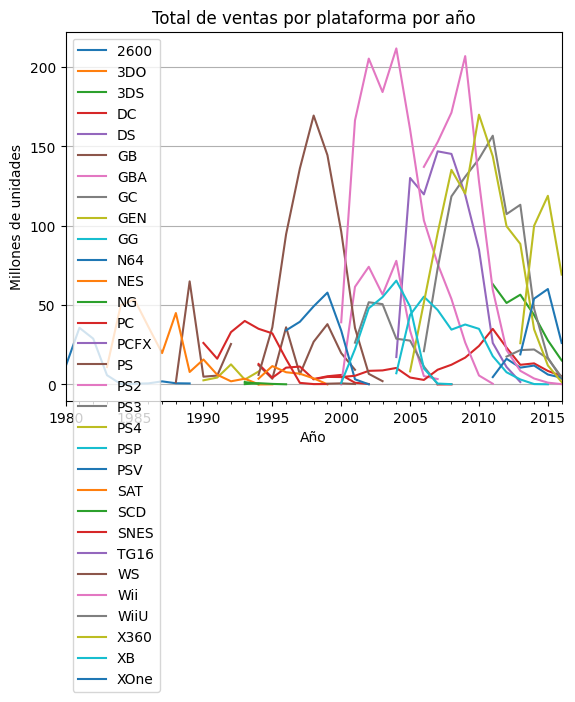

In [31]:
games_info.pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum').plot(kind='line')

plt.xlabel('Año')
plt.ylabel('Millones de unidades')
plt.title('Total de ventas por plataforma por año')
plt.legend()

plt.grid(axis='y')

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Plataformas que han vendido durante más años consecutivos (rentables):
</div>

In [32]:
games_info.groupby('platform')['year'].nunique().sort_values(ascending=False)

platform
PC      26
GB      13
NES     12
X360    12
PSP     12
PS2     12
Wii     11
DS      11
PS3     11
2600    10
SNES    10
PS      10
XB       9
GBA      8
DC       7
GC       7
N64      7
SAT      6
3DS      6
PSV      6
WiiU     5
GEN      5
NG       4
PS4      4
XOne     4
WS       3
SCD      2
3DO      2
TG16     1
GG       1
PCFX     1
Name: year, dtype: int64

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Dsitribución de ventas por plataforma:
</div>

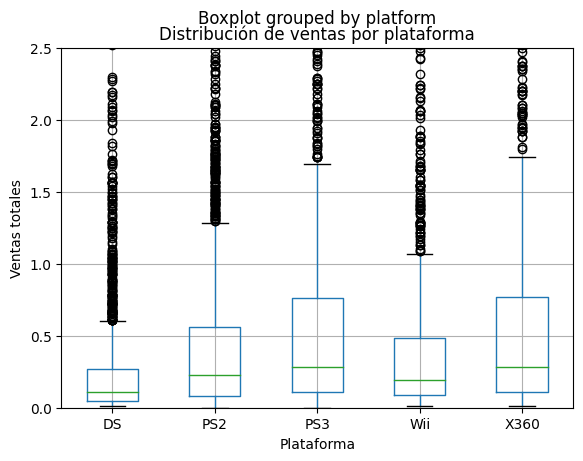

In [33]:
games[games['platform'].isin(popular_platforms)][['total_sales','platform']].boxplot(
    column = 'total_sales',
    by = 'platform',
)
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.title('Distribución de ventas por plataforma')
plt.ylim(0,2.5)
plt.show()

In [34]:
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16079 entries, 0 to 16714
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 16079 non-null  object        
 1   platform             16079 non-null  object        
 2   year_of_release      16079 non-null  float64       
 3   genre                16079 non-null  object        
 4   na_sales             16079 non-null  float64       
 5   eu_sales             16079 non-null  float64       
 6   jp_sales             16079 non-null  float64       
 7   other_sales          16079 non-null  float64       
 8   critic_score         7980 non-null   float64       
 9   user_score           9836 non-null   object        
 10  rating               9764 non-null   object        
 11  year                 16079 non-null  datetime64[ns]
 12  critic_score_filled  16079 non-null  float64       
 13  user_score_filled    16079 non-

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    La distribución de las ventas es mayor para PS3 y X360, la plataforma cuya media es menor es DS 
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Correlación entre reseñas y ventas:
</div>

In [35]:
games.query("platform == 'PS3'")[['total_sales', 'critic_score_filled']].corr()

,total_sales,critic_score_filled
total_sales,1.000000,0.398661
critic_score_filled,0.398661,1.000000


Text(0, 0.5, 'Ventas Totales')

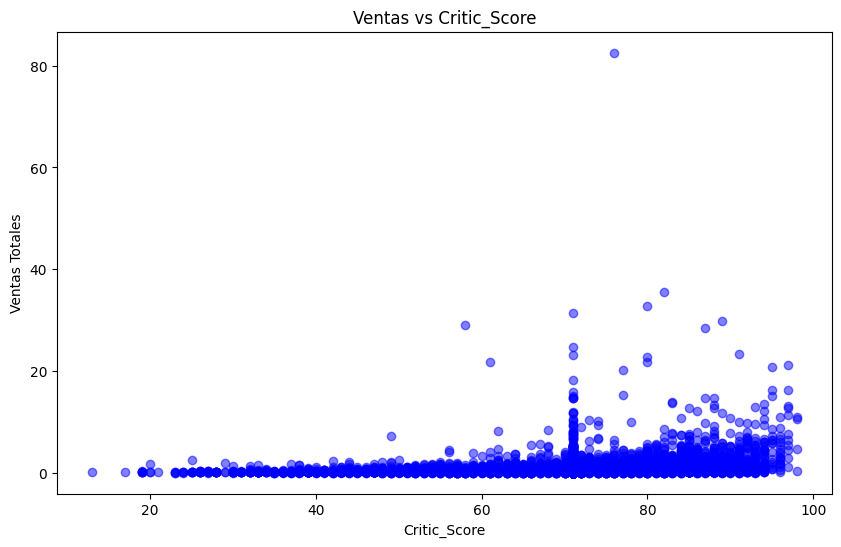

In [36]:
x = games['critic_score_filled']
y = games['total_sales']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5)

plt.title('Ventas vs Critic_Score')
plt.xlabel('Critic_Score')
plt.ylabel('Ventas Totales')

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Existe una correlacion significativa entre las ventas para la plataforma PS3 y su 'critic_score'. De acuerdo a la gráfico de dispersión existe una relacion positiva entre 'critic_score' y las ventas, de tal forma que entre más alto es el score más ventas tienen los videojuegos. 
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Venta del mismo juego en otra plataforma:
</div>

In [37]:
games.groupby('name')['platform'].nunique().sort_values(ascending=False)

name
Need for Speed: Most Wanted            10
LEGO Marvel Super Heroes                9
FIFA 14                                 9
Ratatouille                             9
The LEGO Movie Videogame                8
                                       ..
Inazuma Eleven Strikers                 1
Inazuma Eleven Strikers 2012 Xtreme     1
Incredible Crisis                       1
Independence Day                        1
¡Shin Chan Flipa en colores!            1
Name: platform, Length: 11118, dtype: int64

                              name platform  total_sales
126                        FIFA 14      PS3         6.46
253    Need for Speed: Most Wanted      PS2         4.37
271                        FIFA 14     X360         4.22
469                        FIFA 14      PS4         3.01
523    Need for Speed: Most Wanted      PS3         2.81
730       LEGO Marvel Super Heroes     X360         2.22
945       LEGO Marvel Super Heroes      PS3         1.83
1139      LEGO Marvel Super Heroes      PS4         1.62
1190   Need for Speed: Most Wanted     X360         1.56
1548      The LEGO Movie Videogame     X360         1.27
1591   Need for Speed: Most Wanted     X360         1.25
1598                   Ratatouille       DS         1.25
1753                       FIFA 14     XOne         1.16
1959      LEGO Marvel Super Heroes     XOne         1.05
1998   Need for Speed: Most Wanted       XB         1.04
2048   Need for Speed: Most Wanted      PSV         1.01
2236      The LEGO Movie Videog

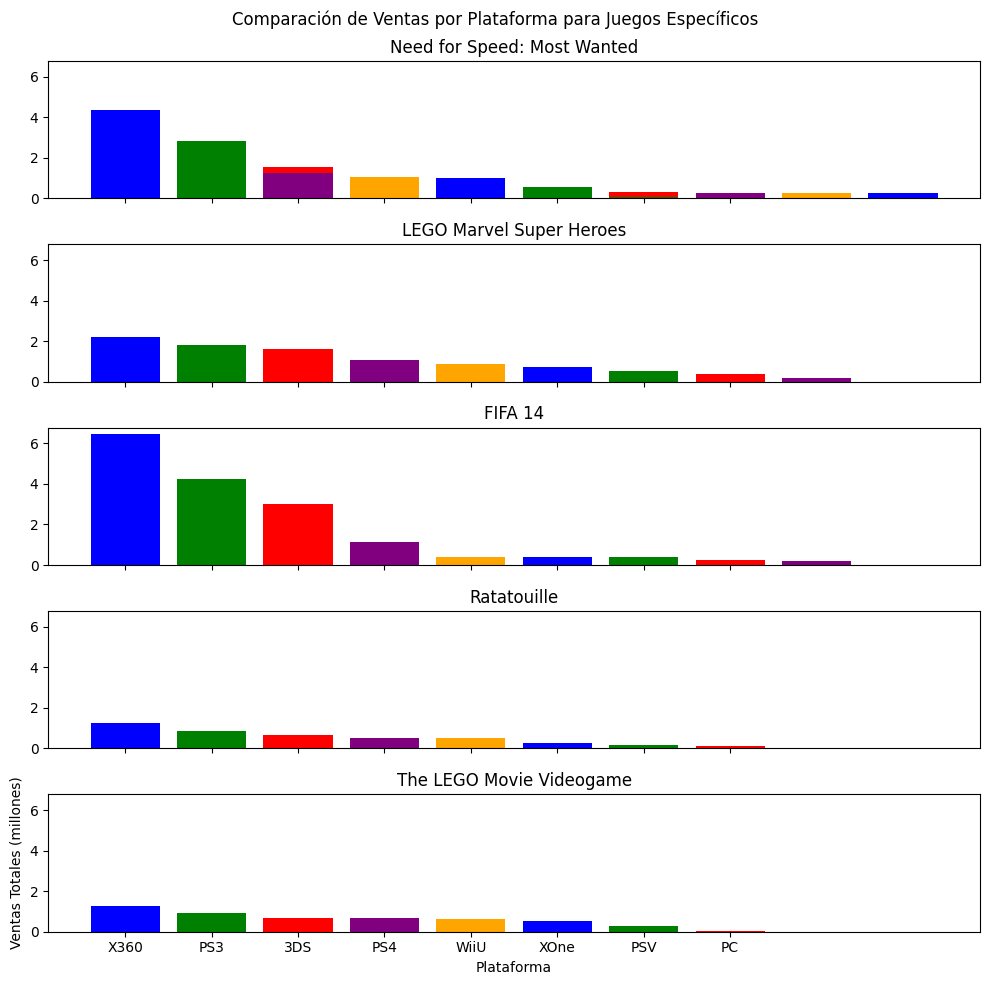

In [38]:
juegos = ['Need for Speed: Most Wanted', 'LEGO Marvel Super Heroes', 'FIFA 14', 'Ratatouille', 'The LEGO Movie Videogame']
games_filtrados = games[games['name'].isin(juegos)]

print(games_filtrados[['name', 'platform', 'total_sales']])

plataformas = games_filtrados['platform'].unique()
num_juegos = len(juegos) 

fig, axs = plt.subplots(num_juegos, figsize=(10, 10), sharex=True, sharey=True)

for i, juego in enumerate(juegos):
    data_juego = games_filtrados[games_filtrados['name'] == juego]
    x = data_juego['platform']
    y = data_juego['total_sales']
    axs[i].bar(x, y, color=['blue', 'green', 'red', 'purple', 'orange'])
    axs[i].set_title(juego)
    
fig.suptitle('Comparación de Ventas por Plataforma para Juegos Específicos')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.tight_layout()

plt.show()

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Los primeros 5 juegos que estan en más de 7 plataformas en general tuvieron más ventas para Xbox360 depués PS3, 3DS y finalmente PS4.
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Distribución por género:
</div>

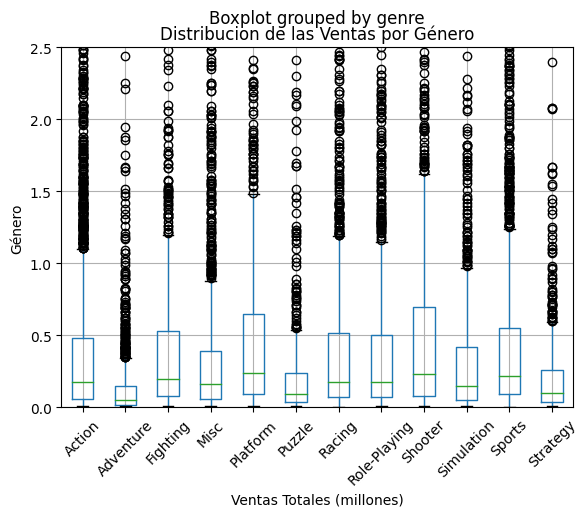

In [39]:
games.boxplot(column='total_sales',
             by='genre',
             )
plt.ylim(0,2.5)
plt.xticks(rotation=45)
plt.ylabel('Género')
plt.xlabel('Ventas Totales (millones)')
plt.title('Distribucion de las Ventas por Género')
plt.show()

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Aparentemente los videojuegos más rentables son en primer lugar: Platform, en segundo lugar: Shooter y en tercer lugar: fighting o sports. Los videojuegos menos rentables son Adventure, Puzzle y Strategy.
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A52A2A;">
    <b>Perfil de usuario por region:</b> <a class="tocSkip"></a>
    
</div>

In [40]:
regionNA = "na_sales"

platforms_sales = games.groupby("platform")[regionNA].sum()
top_5_platforms_na = platforms_sales.sort_values().tail(5).reset_index()
top_5_platforms_na['market_share'] = top_5_platforms_na[regionNA] / platforms_sales.sum()
top_5_platforms_na


,platform,na_sales,market_share
0,DS,380.31,0.094639
1,PS3,390.13,0.097083
2,Wii,486.87,0.121156
3,PS2,572.92,0.142570
4,X360,595.74,0.148248


In [41]:
top_5_platforms_na['market_share'].sum()

0.603695878841267

In [42]:
regionEU = 'eu_sales'

platforms_sales = games.groupby("platform")[regionEU].sum()
top_5_platforms_eu = platforms_sales.sort_values().tail(5).reset_index()
top_5_platforms_eu['market_share'] = top_5_platforms_eu[regionEU] / platforms_sales.sum()
top_5_platforms_eu

,platform,eu_sales,market_share
0,PS,212.39,0.090744
1,Wii,258.32,0.110368
2,X360,268.32,0.114640
3,PS3,327.21,0.139801
4,PS2,332.63,0.142117


In [43]:
top_5_platforms_eu['market_share'].sum()

0.5976697685149563

In [44]:
regionJP = 'jp_sales'

platforms_sales = games.groupby("platform")[regionJP].sum()
top_5_platforms_jp = platforms_sales.sort_values().tail(5).reset_index()
top_5_platforms_jp['market_share'] = top_5_platforms_jp[regionJP] / platforms_sales.sum()
top_5_platforms_jp

,platform,jp_sales,market_share
0,PS3,79.41,0.071913
1,3DS,100.62,0.091121
2,PS2,137.54,0.124555
3,PS,139.78,0.126584
4,DS,175.00,0.158479


In [45]:
top_5_platforms_jp['market_share'].sum()

0.5726511206701385

In [46]:
games_info['ratings_summed'] = np.where(
    games_info['rating_filled'].isin(['EC','K-A','RP','AO']),
    "Other",
    games_info['rating_filled']
)
print(games_info['ratings_summed'])

0        E
1        E
2        E
3        E
4        E
        ..
16710    E
16711    E
16712    E
16713    E
16714    E
Name: ratings_summed, Length: 16715, dtype: object


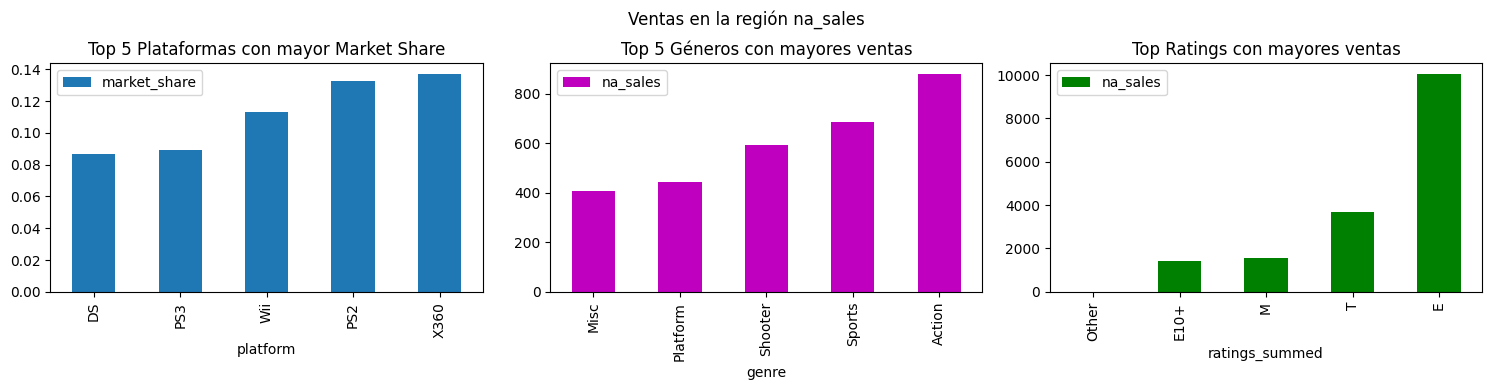

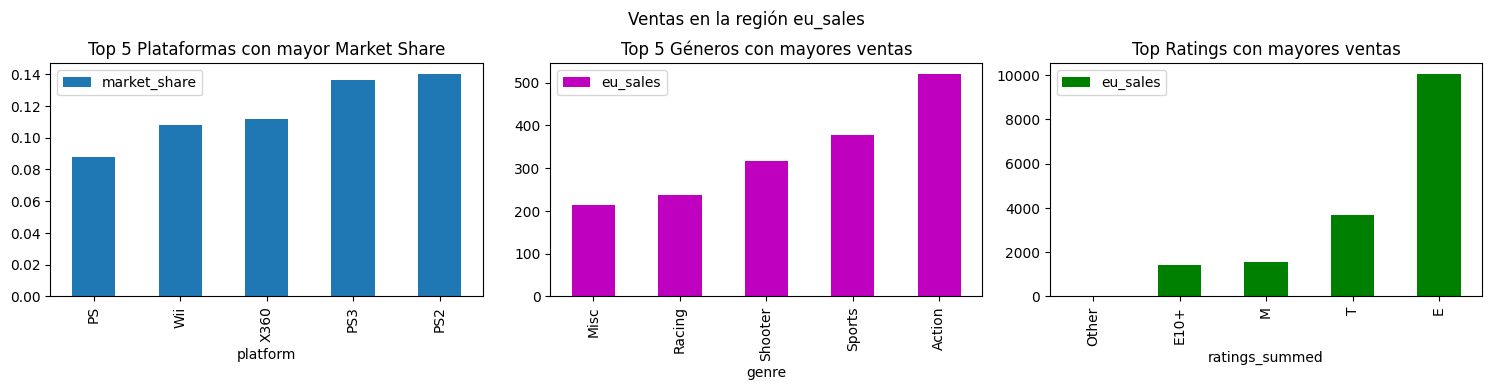

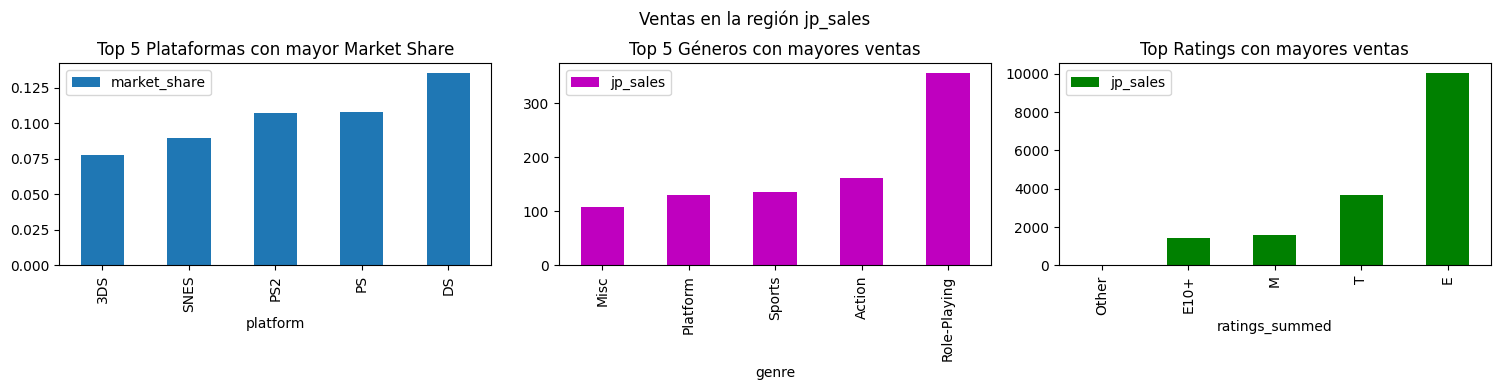

In [47]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    
    fig, axes = plt.subplots(ncols=3, figsize=(15, 4)) 
    
    sales_by_platform = games_info.groupby('platform')[region].sum()
    top_platforms = sales_by_platform.sort_values().tail(5).reset_index()
    top_platforms['market_share'] = top_platforms[region] / sales_by_platform.sum()
    
    top_genres = games_info.groupby('genre')[region].sum().sort_values().tail(5).reset_index()
    
    top_ratings = games_info.groupby('ratings_summed')[region].count().sort_values().reset_index()
    
    fig.suptitle(f"Ventas en la región {region}", y=0.96)
    
    axes[0].set_title('Top 5 Plataformas con mayor Market Share')
    top_platforms.plot(kind='bar', x='platform', y= 'market_share', ax=axes[0])
    
    axes[1].set_title('Top 5 Géneros con mayores ventas')
    top_genres.plot(kind='bar', x='genre', y=region, ax=axes[1], color = 'm')
    
    axes[2].set_title('Top Ratings con mayores ventas')
    top_ratings.plot(kind='bar', x='ratings_summed', y=region, ax=axes[2], color='g')
    
    fig.tight_layout(pad=1)

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Lo sobresaliente de estos gráficos es que podemos ver resumido las similitudes y diferencias del comportamiento de las ventas por región. Así, podemos ver que en Norte América fue más popular el Xbox360 por lo tanto el Market Share en mayor gracias a esta consola, mientras que en Europa fue la PS2 y en Japón el DS. 
    El género que tuvo mayores ventas en NA fue 'Action' igual que en EU, sin embargo, en JP esto fue diferente siendo el género de Role-Playing el que recaudó mayores ventas. Finalmente, en cuanto al Rating que se le atribuye una mayor popularidad podemos decir que para las tres regiones es E. 
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A52A2A;">
    <b>Pruebas de hipótesis:</b> <a class="tocSkip"></a>
    
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>H1:</b> <a class="tocSkip"></a> Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>H0:</b> <a class="tocSkip"></a> Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
</div>

In [48]:
xone_scores = games[games['platform'] == 'XOne']['user_score_filled'].astype(float)
pc_scores = games[games['platform'] == 'PC']['user_score_filled'].astype(float)

statistic, p_value = levene(xone_scores, pc_scores)

print(p_value)

alpha = 0.05
t_statistic, p_value = ttest_ind(xone_scores, pc_scores, equal_var=True)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


0.9450752127751662
T-statistic: -3.98181508976029
P-value: 7.251709446869575e-05


<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Utilicé primero una prueba de Levene para determinar estadísticamente la diferncia entre las varianzas la cual arrojó que no habia diferencias significativas. Con lo anterior determiné utilizar un ttest para muestras independientes ya que asume que sus varianzaz son idénticas. Así, para la prueba de hipótesis establecí un equal_var=True con lo anterior y a pesar de haber rellenado los tbd y NaNs con la mediana obtuve que sí existen diferencias significativas entre la media de la calificación de los usuarios para la plataforma XOne contra PC con un valor de p < 0.05. 

</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>H1:</b> <a class="tocSkip"></a>Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>H0:</b> <a class="tocSkip"></a>Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
</div>

In [49]:
action_scores = games[games['genre'] == 'Action']['user_score_filled'].astype(float)
sports_scores = games[games['genre'] == 'Sports']['user_score_filled'].astype(float)

statistic, p_value = levene(action_scores, sports_scores)

print(p_value)

alpha = 0.05
t_statistic, p_value = ttest_ind(action_scores, sports_scores, equal_var=True)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


0.6973955214726704
T-statistic: 0.5366184515318835
P-value: 0.5915529635175885


<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b>♣</b> <a class="tocSkip"></a>
    Para esta prueba de hipotesis también utilicé un ttest_ind para muestras independientes bajo el mismo criterio de igualdad de las varianzas, esto lo corroboré con una prueba de Levene y podemos conlcuir que no hay diferencias significativas entre la calificación promedio de los videojuegos del género 'Action' comparado con los videojuegos del género 'Sports'. Por lo tanto, no se rechaza la hipótesis nula con un valor de p > 0.05. En este caso, este resultado pudo verse influido por la modificacion de los NaNs y tbd con la mediana lo cual igualó las calificaciones para ambos géneros. 
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A52A2A;">
    <b>Conclusión general:</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b> </b> <a class="tocSkip"></a> 
    Para poder analizar los datos es importante tener homogeneidad en el formato de los nombres de las columnas, al igual que en el formato de los datos. Es probable que nos encontremos con valores ausentes o diferentes los cuales deben de valorarse para encontrar la mejor manera de tratarlos, ya sea rellenándolos o ignorándolos dependiendo de la información que proveen. También es immportante mantener congruencia en los gráficos siendo lo más explícitos posibles en cada uno de ellos para entender lo que se quiere transmitir.
</div>

<div class="alert alert-block alert-info" style="background-color: #E6CBDD; border-color: #3E3C3C; color: #A67F78;">
    <b> </b> <a class="tocSkip"></a> 
    En cuanto a los resultados obtenidos del análisis del dataframe de videojuegos podemos decir que de todos las plataformas evaluadas existen unas que tuvieron más exito que otras, al igual que de los videojuegos. Hay parámetros que son determinantes en el éxito de un videojuego como la plataforma, el género y a quien va dirigido. Finalmente, con estos elementos podemos hacer una proyección del comportamiento de las ventas de videojuegos nuevos para años posteriores.
</div>